In [1]:
path = 'data/GrowthProfilerNonParametricResults.csv'

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
# Load the csv file
df=pd.read_csv(path)

# split the 'Identifier' column into new columns

# Split the 'Identifier' column into new columns
identifier_split = df['Identifier'].str.split('_', expand=True)
df['WellPlate'] = identifier_split[0]
df['Format'] = identifier_split[1]
df['FloVsMan'] = identifier_split[2]
df['Media'] = identifier_split[3]


# Group by Format, FlowType, and Media and calculate mean and variance of GrowthRate
summary_stats = df.groupby(['Format', 'FloVsMan', 'Media'])['GrowthRate'].agg(['mean', 'var']).reset_index()
summary_stats['std'] = np.sqrt(summary_stats['var'])
# Display the summary statistics
print(summary_stats)


   Format FloVsMan   Media      mean      var       std
0      24      flo  media1  0.360000  0.00000  0.000000
1      24      flo  media2  0.460000  0.00120  0.034641
2      24      flo  media3  0.520000  0.00480  0.069282
3      24      flo  media4  0.540000  0.00000  0.000000
4      24      man  media1  0.120000  0.00000  0.000000
5      24      man  media2  0.400000  0.00120  0.034641
6      24      man  media3  0.400000  0.00120  0.034641
7      24      man  media4  0.440000  0.00120  0.034641
8      96      flo  media1  0.260000  0.00120  0.034641
9      96      flo  media2  0.336000  0.00108  0.032863
10     96      flo  media3  0.300000  0.00000  0.000000
11     96      flo  media4  0.340000  0.00120  0.034641
12     96      man  media1  0.246667  0.01120  0.105830
13     96      man  media2  0.266667  0.00100  0.031623
14     96      man  media3  0.260000  0.00090  0.030000
15     96      man  media4  0.326667  0.00100  0.031623


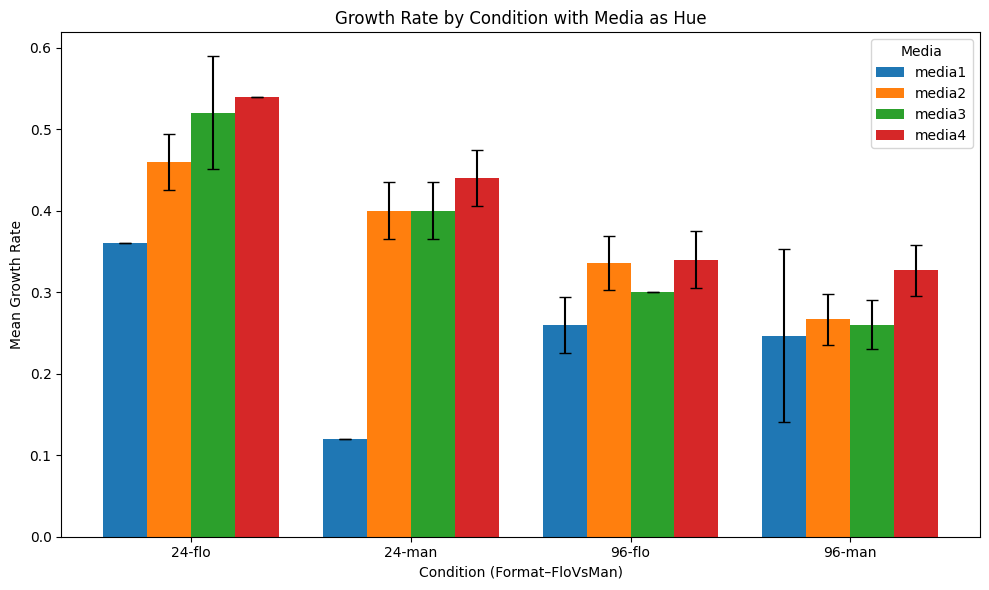

In [31]:
# Make sure std + Condition exist
summary_stats['std'] = np.sqrt(summary_stats['var'])
summary_stats['Condition'] = summary_stats['Format'].astype(str) + "-" + summary_stats['FloVsMan']

conds  = summary_stats['Condition'].unique()
medias = summary_stats['Media'].unique()

x = np.arange(len(conds))        # positions for conditions
width = 0.8 / len(medias)        # distribute bars within each group

plt.figure(figsize=(10,6))
for i, media in enumerate(medias):
    sub = summary_stats[summary_stats['Media']==media]
    plt.bar(
        x + i*width, 
        sub['mean'], 
        width, 
        label=f"{media}", 
        yerr=sub['std'], 
        capsize=4
    )

plt.xticks(x + width*(len(medias)-1)/2, conds)
plt.xlabel("Condition (Format–FloVsMan)")
plt.ylabel("Mean Growth Rate")
plt.title("Growth Rate by Condition with Media as Hue")
plt.legend(title="Media")
plt.tight_layout()
plt.show()


In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Make sure std + Condition exist
summary_stats['std'] = np.sqrt(summary_stats['var'])
summary_stats['Condition'] = summary_stats['Format'].astype(str) + "-" + summary_stats['FloVsMan']

# Custom order
cond_order = ["24-Man", "96-Man", "24-Flo", "96-Flo"]
medias = sorted(summary_stats['Media'].unique(), key=lambda x: int(x))  # force Media 1–4 numeric order

x = np.arange(len(cond_order))        # positions for conditions
width = 0.8 / len(medias)             # distribute bars within each group

plt.figure(figsize=(10,6))
for i, media in enumerate(medias):
    sub = summary_stats[summary_stats['Media']==media].set_index('Condition').reindex(cond_order).reset_index()
    plt.bar(
        x + i*width, 
        sub['mean'], 
        width, 
        label=f"Media {media}", 
        yerr=sub['std'], 
        capsize=4
    )

plt.xticks(x + width*(len(medias)-1)/2, cond_order)
plt.xlabel("Condition (Format–FloVsMan)")
plt.ylabel("Mean Growth Rate")
plt.title("Growth Rate by Condition with Media as Hue")
plt.legend(title="Media")
plt.tight_layout()
plt.show()


ValueError: invalid literal for int() with base 10: 'media1'